# Methane Hotspot

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from thesis_setup import thesis_setup
from thesis_setup import getL8Dates
from thesis import compiled_regression
from thesis import check_L8
pd.options.display.max_columns = None

# Path names
rootPath = '/Users/darianng/Documents/Msc_Geography/Msc Thesis'

def showAllKeys(data):
    # Showing data keys.
    print(f'--ALL DATA KEYS--\n')
    for key in data.keys():
        if isinstance(data[key],dict):
            print(f'Key: {key}\n       {list(data[key].keys())}')
            for subkey in data[key].keys():
                if isinstance(data[key][subkey],dict):
                    print(f'        keys:\n          {subkey}: {list(data[key][subkey].keys())}')
        else:
            print(f'Key: {key}')

In [1]:
from thesis_setup import getL8Dates
getL8Dates('Hogg')

Landsat 8 dates for Hogg (32 total images):

2021 (12): 
[20210511 20210527 20210612 20210628 20210714 20210730 20210815 20210831
 20210916 20211002 20211018 20211103]

2022 (16): 
[20220106 20220207 20220223 20220311 20220327 20220428 20220615 20220701
 20220717 20220802 20220818 20220903 20221005 20221021 20221122 20221224]

2023 (4): 
[20230210 20230330 20230415 20230501]


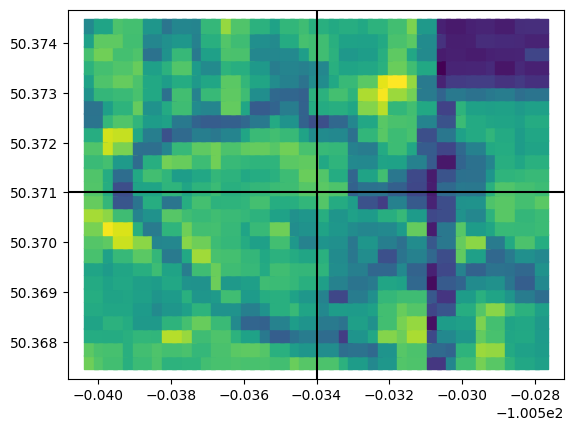

In [34]:
from thesis import check_L8
check_L8(site='Hogg',L8_date=20230501,product='NDVI',pixelSize=100)

# Perform Cluster

In [161]:
from thesis import preprocess_maps
from thesis import ffp_clustering

data = preprocess_maps(siteName = 'Young',fluxmap_filename = '202107015-202108015',L8_date = 20221122)
data, fig = ffp_clustering(data,GHG_var='ch4',n_clusters=5)

# Save Run

Figures and data saved to: 
/Users/darianng/Documents/Msc_Geography/Methane_Hotspot/FARF_Code/python_code/Saved_Data_Cluster/US-Myb_FFP=202010017-202010031_L8=20201028


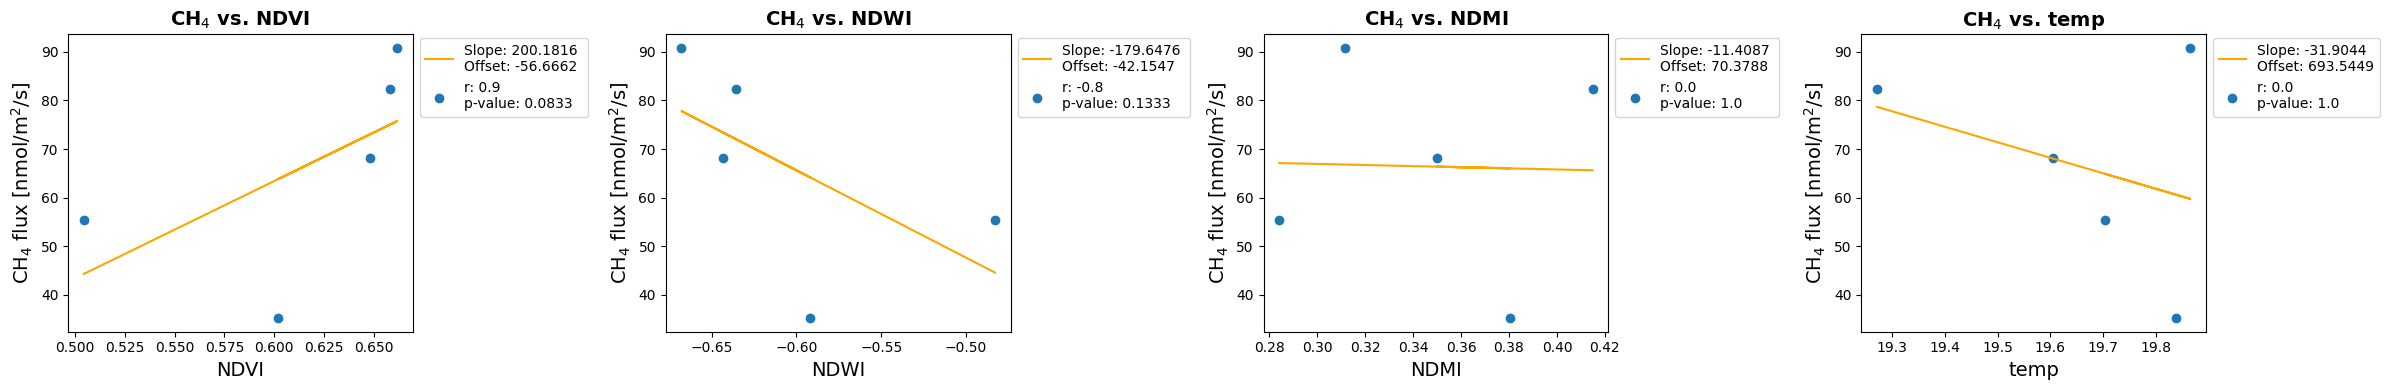

<Figure size 800x1500 with 0 Axes>

In [72]:
from thesis_setup import thesis_setup
from thesis import save_cluster
save_folder = thesis_setup('US-Myb')[8]
fig1,data = save_cluster(data,save_folder)
plt.clf()

In [50]:
import pickle
regressionPath = '/Users/darianng/Documents/Msc_Geography/MSc Thesis/Data/Compilation/US-Myb_June'
regressionName = 'US-Myb_FFP=202106010-202107010_L8=20210625'
with open(regressionPath+'/'+regressionName+'.p', 'wb') as fp:
        pickle.dump(data, fp, protocol=pickle.HIGHEST_PROTOCOL)

fig1.savefig(regressionPath+'/'+regressionName+'.png')


Collapsing data to single analysis...half way there...done!


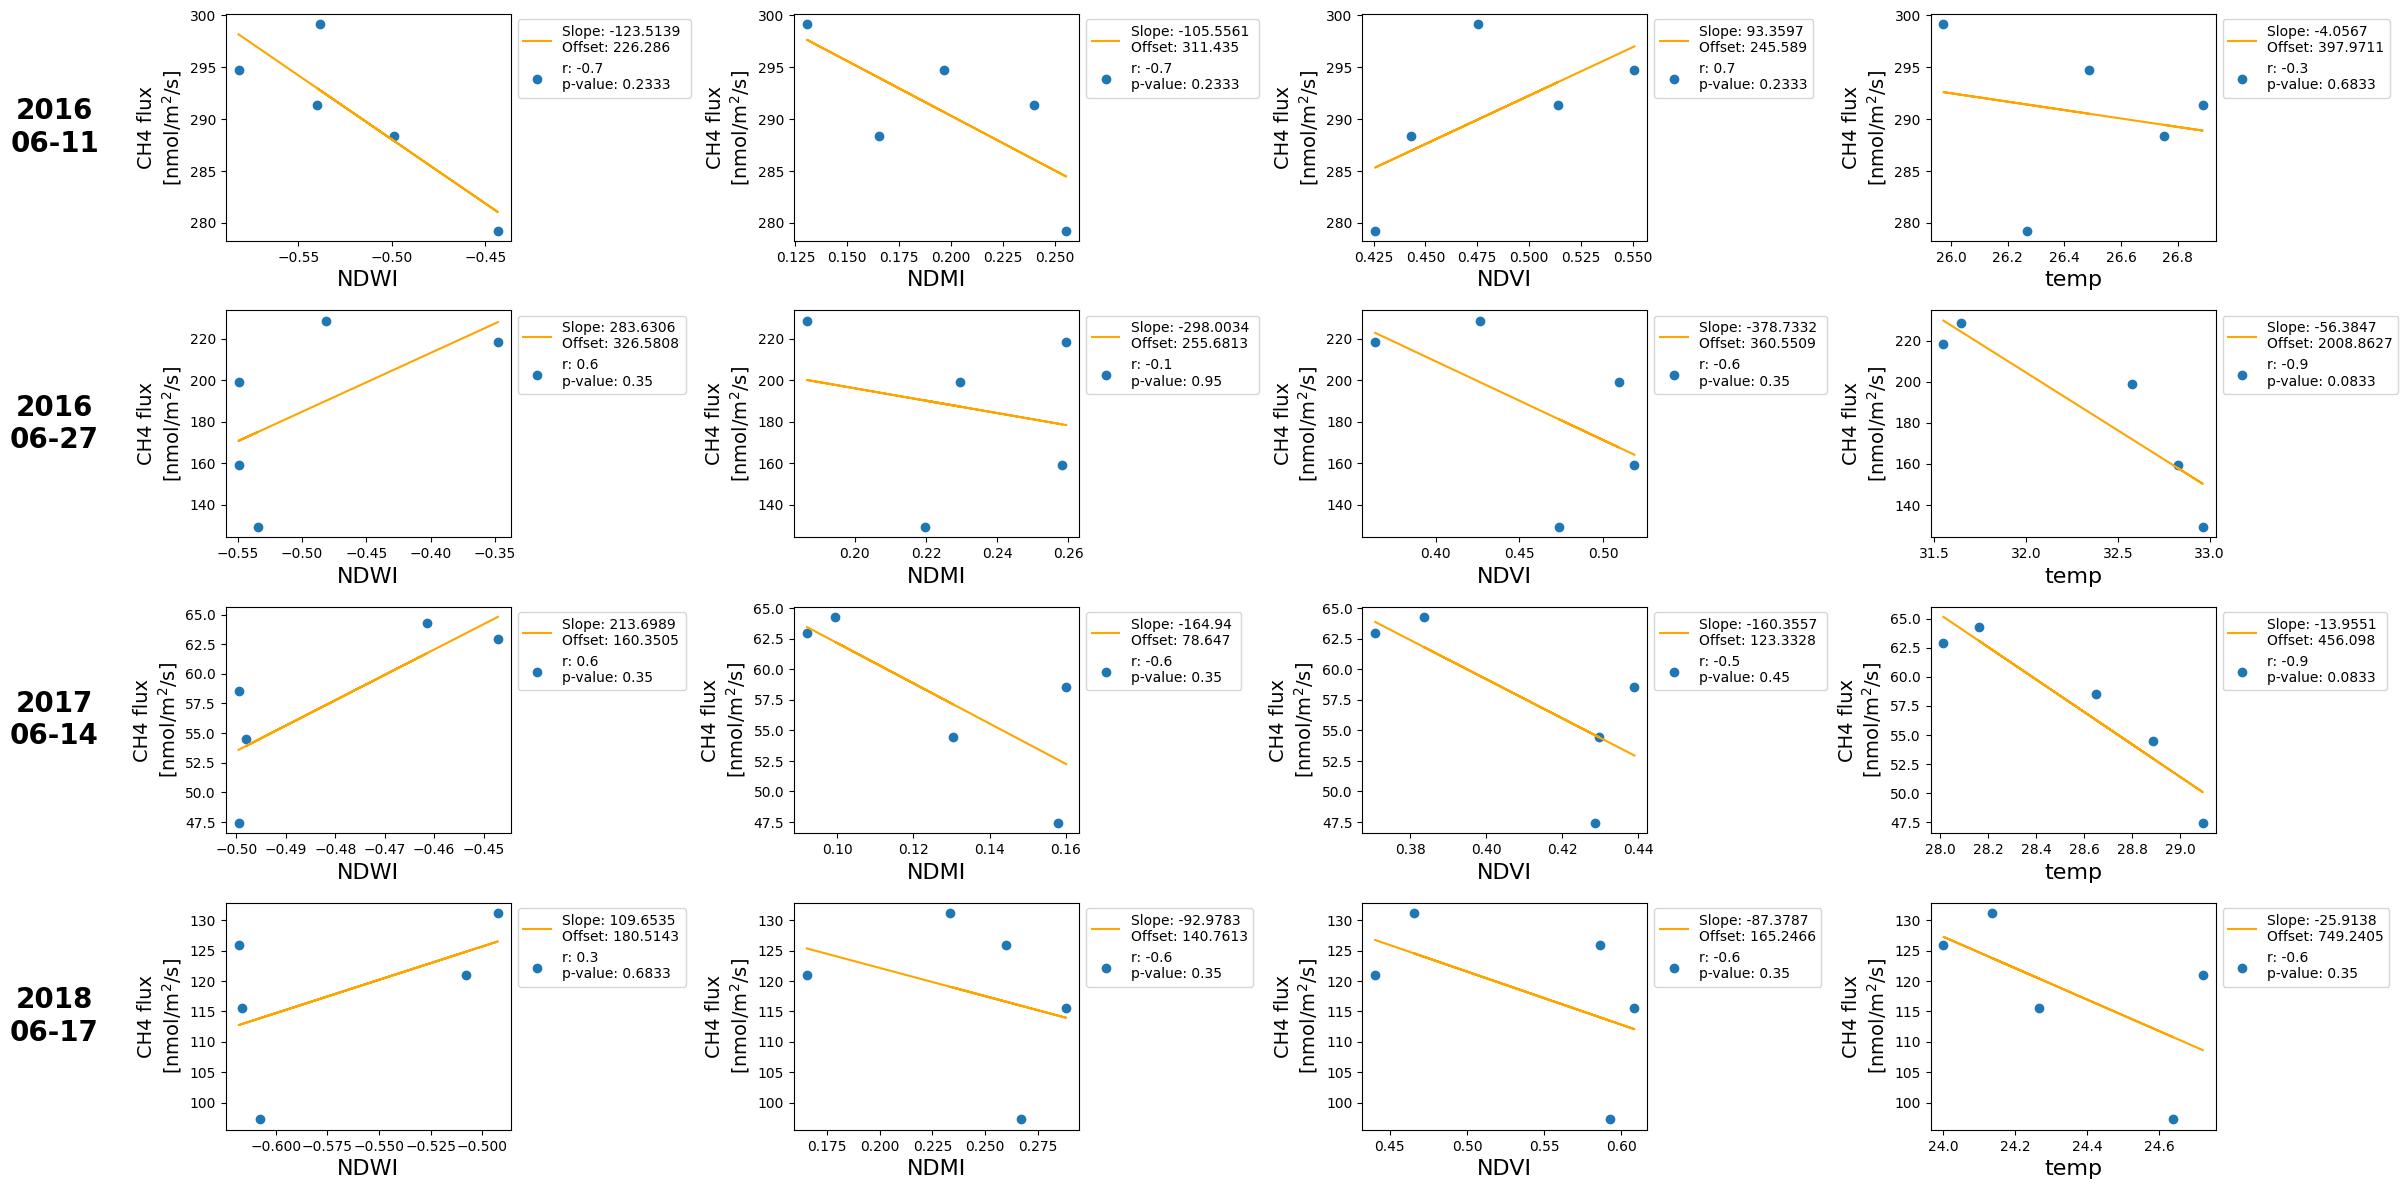

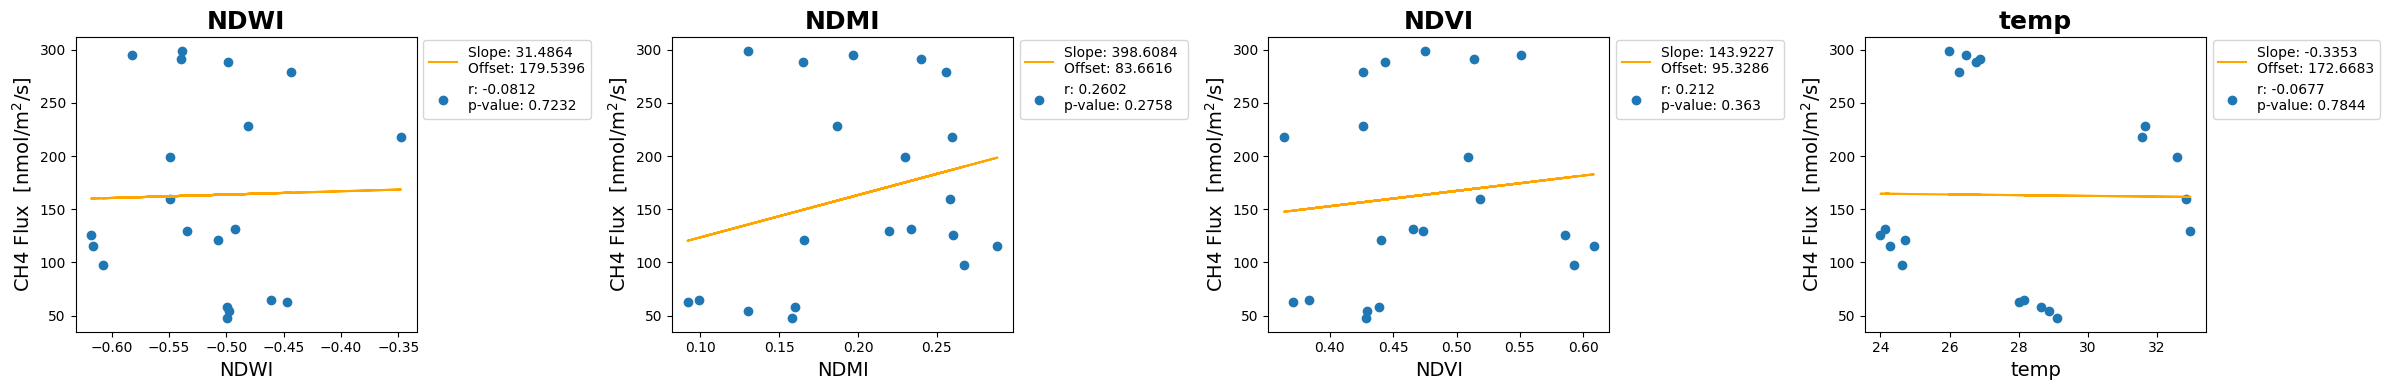

In [153]:
from thesis import compiled_regression
compiled_data = ['US-Myb_FFP=201306005-201307005_L8=20130619',
                 'US-Myb_FFP=201405020-201406020_L8=20140606',
                 'US-Myb_FFP=201505025-201506025_L8=20160611',
                 'US-Myb_FFP=201606012-201607012_L8=20160627',
                 'US-Myb_FFP=201706001-201707001_L8=20170614',
                 'US-Myb_FFP=201806001-201807001_L8=20180617']
dataPath = '/Users/darianng/Documents/MSc_Geography/MSc Thesis/Data/Compilation/US-Myb_June/'
# dataPath = '/Users/darianng/Documents/Msc_Geography/Methane_Hotspot/FARF_Code/python_code/Saved_Data_Cluster'
fig1,fig2,compiled_data = compiled_regression(compiled_data,dataPath,correlation='Spearman')

In [6]:
showAllKeys(data)
'US-Myb_FFP=201306005-201307005_L8=20130619',
                 'US-Myb_FFP=201405020-201406020_L8=20140606',

--ALL DATA KEYS--

Key: siteName
Key: landsat
       ['MNDWI2', 'NDMI', 'NDVI', 'NDWI', 'temp', 'lonData', 'latData']
Key: matched_ffp
       ['xr', 'yr', 'co2', 'ch4', 'h']
Key: ffp
       ['xr', 'yr', 'co2', 'ch4', 'h']
Key: lonData
Key: latData
Key: spatialData
       ['MNDWI2', 'NDMI', 'NDVI', 'NDWI', 'temp']
Key: run
Key: clustered_landsat
       ['NDVI', 'NDWI', 'NDMI', 'MNDWI2', 'temp']
Key: clustered_ffp
Key: GHG_var


In [20]:
thesis_setup('US-Myb')

([-121.7651, 38.0498],
 'US-Myb_spatial_indices_2013_Feb_2021_Dec.csv',
 '/Users/darianng/Documents/Msc_Geography/Methane_Hotspot/FARF_Code/python_code',
 '/Users/darianng/Documents/MSc_Geography/MSc Thesis',
 '/Users/darianng/Documents/MSc_Geography/MSc Thesis/Figures',
 '/Users/darianng/Documents/MSc_Geography/MSc Thesis/Data',
 '/Volumes/GoogleDrive/My Drive/Micromet_GEE',
 '/Users/darianng/Documents/MSc_Geography/Methane_Hotspot/FARF_Code/python_code/data',
 '/Users/darianng/Documents/Msc_Geography/Methane_Hotspot/FARF_Code/python_code/Saved_Data_Cluster')

Collapsing data to single analysis...half way there...done!


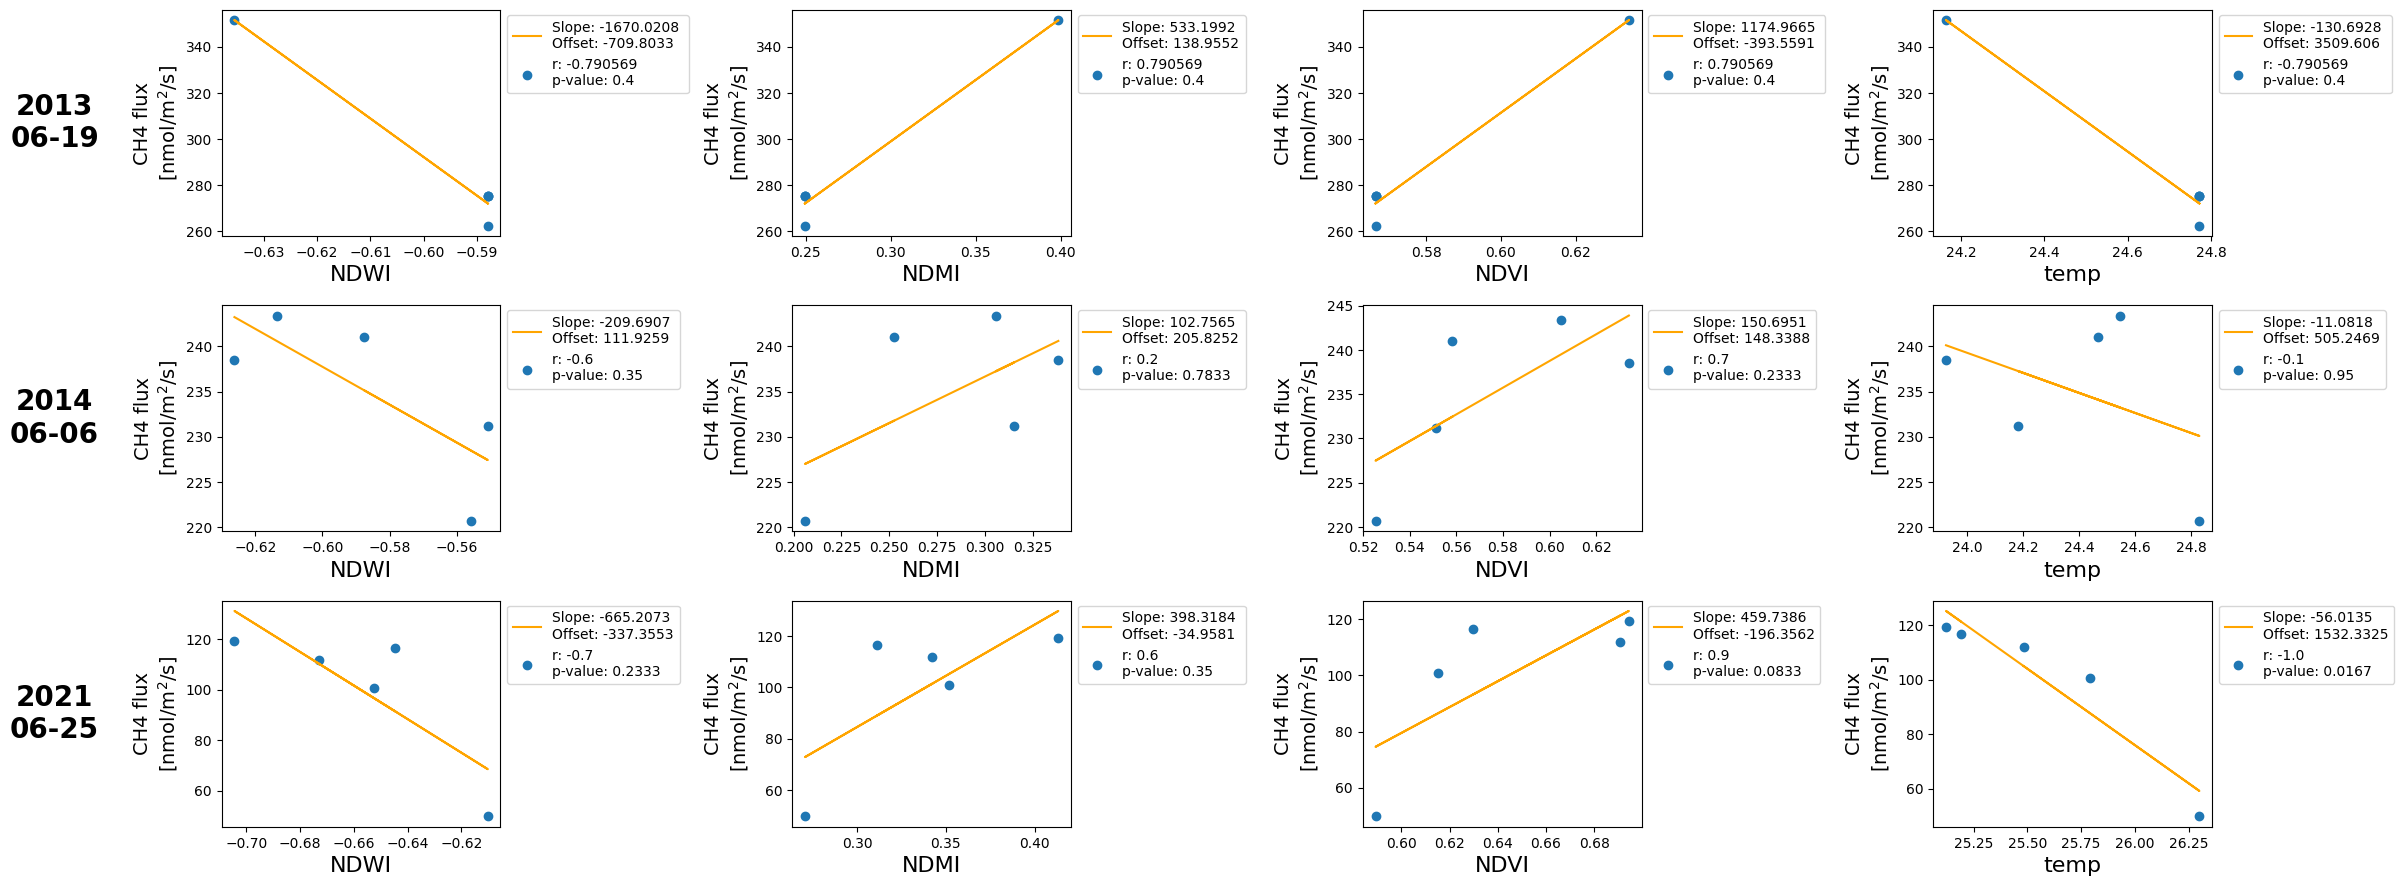

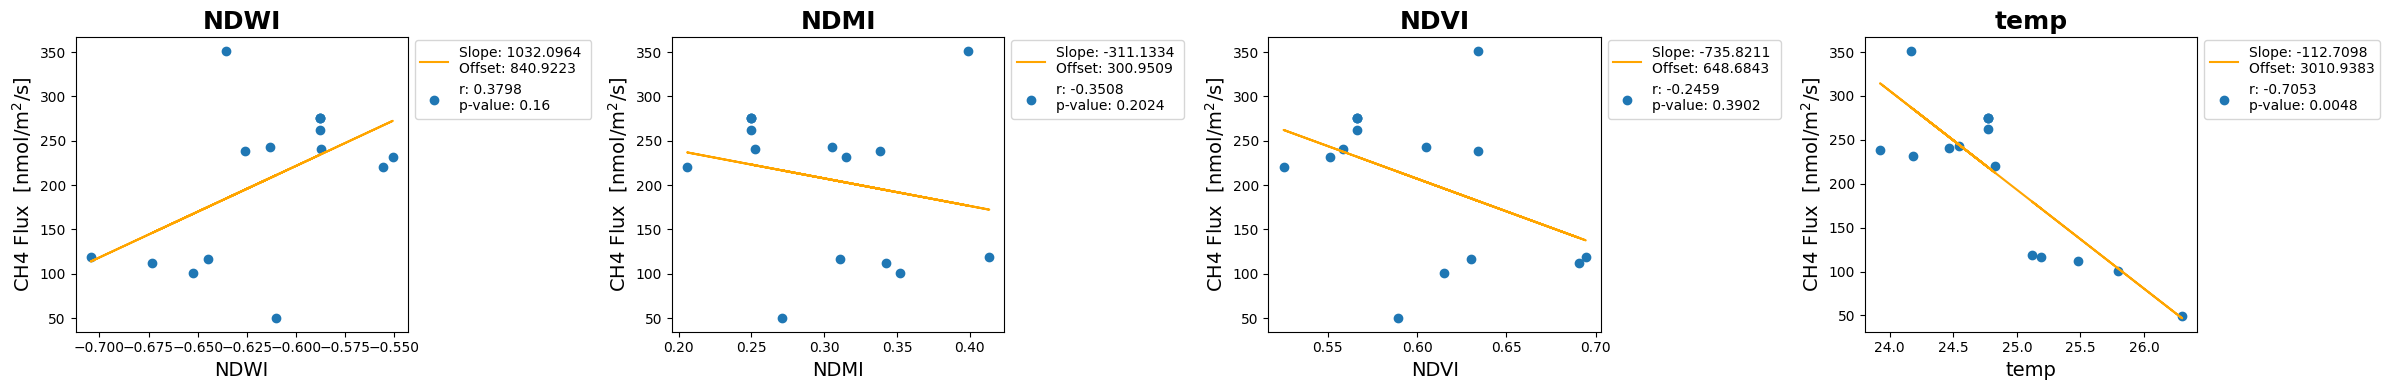

In [65]:
# Doing across years.
compiled_data = ['US-Myb_FFP=201306005-201307005_L8=20130619',
                 'US-Myb_FFP=201405020-201406020_L8=20140606',
#                  'US-Myb_FFP=201505025-201506025_L8=20150625',
#                  'US-Myb_FFP=201606012-201607012_L8=20160627',
#                  'US-Myb_FFP=201706001-201707001_L8=20170614',
#                  'US-Myb_FFP=201806001-201807001_L8=20180617',
#                 'US-Myb_FFP=201906010-201907010_L8=20190620',
#                 'US-Myb_FFP=202006007-202007007_L8=20200622',
                'US-Myb_FFP=202106010-202107010_L8=20210625']
fig1,fig2,compiled_data = compiled_regression(compiled_data,dataPath,correlation='Spearman')

In [64]:
fig1.savefig(regressionPath+'/'+'All_Individual.png')
fig2.savefig(regressionPath+'/'+'Compiled.png')

# Supplemental

Text(0.5, 1.0, 'wind_dir')

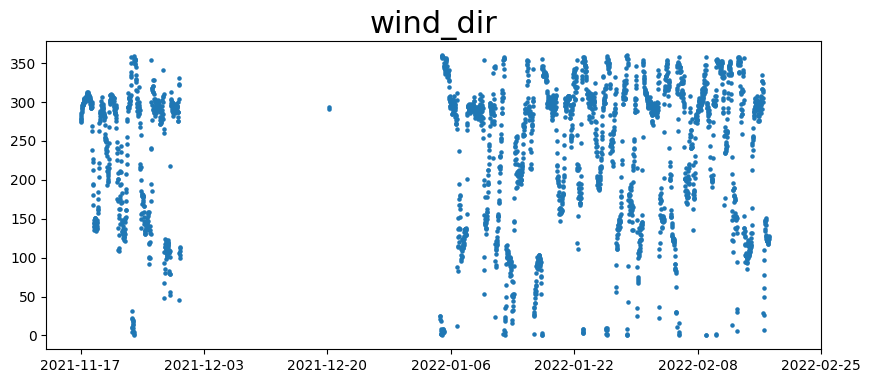

In [152]:
AmerifluxPath = '/Users/darianng/Documents/Msc_Geography/Methane_Hotspot/Site_Data'
os.chdir(AmerifluxPath)
L3 = pd.read_csv('Young_L3.csv',delimiter=',',header=0)
plt.figure(figsize=(10,4))
time_start = "2021-11-17 00:00:00"
time_end = "2022-02-17 23:30:00"
# time_start = 201401010000
# time_end = 201412310000
plot_var = 'wind_dir'
window_start = np.where(L3['DATE']==time_start)[0][0]
window_end = np.where(L3['DATE']==time_end)[0][0]
windowedData = L3[plot_var][window_start:window_end]
# Remove 'nans'
windowedData[windowedData<-1000] = np.nan
plotData = windowedData
# plotData = windowedData[windowedData>-1000]

plt.scatter(np.arange(window_start,window_end),plotData,s=5)
xtick_position = np.arange(window_start,window_end+800,800)
# xtick_labels = L3['month'][xtick_position]
xtick_labels = L3['date.x'][xtick_position]
plt.xticks(xtick_position,xtick_labels)

plt.title(plot_var,fontsize=22)

In [ ]:
#  Myb good
['US-Myb_FFP=201306005-201307005_L8=20130619',
                 'US-Myb_FFP=201405020-201406020_L8=20140606',
                 'US-Myb_FFP=201505025-201506025_L8=20160611',
                 'US-Myb_FFP=201606012-201607012_L8=20160627',
                 'US-Myb_FFP=201706001-201707001_L8=20170614',
                 'US-Myb_FFP=201806001-201807001_L8=20180617']

In [ ]:
plt.pcolormesh(data['ffp']['xr'],data['ffp']['yr'],data['ffp']['ch4'])

# Preruns

In [24]:
Young_ffpList = ['202106029-202107029','202107024-202108023','202108016-202109015','202108025-202109024',
    '202109010-202110010','202109017-202110017','202109026-202110026','202110003-202111002','202110019-202111018',
    '202202027-202203026','202204006-202205006','202205008-202206007','202205031-202206030','202206016-202207016',
    '202207002-202208001','202207011-202208010','202208003-202209002','202208019-202209018','202209013-202210013',
    '202210006-202211005','202210015-202211014','202212009-202301008','202212018-202301017','202301003-202302002',
    '202301026-202302025','202302023-202303022','202303008-202304007']

In [25]:
# Doing within year
L8_list = [20210714,20210808,20210831,20210909,20210925,20211002,20211011,20211018,20211103,
          20220311,20220421,20220523,20220615,20220701,20220717,20220726,20220818,
          20220903,20220928,20221021,20221030,20221224,20230102,20230118,20230210,20230307,20230323]
len(Young_ffpList),len(L8_list)

(27, 27)

In [28]:
# RUNNING
from thesis import preprocess_maps
from thesis import ffp_clustering
from thesis_setup import thesis_setup
from thesis import save_cluster
import matplotlib.pyplot as plt
import os

save_folder = '/Users/darianng/Documents/Msc_Geography/Methane_Hotspot/FARF_Code/python_code/Saved_Data_Cluster_May2023'
ffp_path = '/Users/darianng/Documents/MSc_Geography/Methane_Hotspot/FARF_Code/python_code/data/compilation/Young'
site_name = 'Young'

for run_number in range(len(L8_list)):
    # ffp filename 
    ffp_run_ID = Young_ffpList[run_number] # e.g.'202107015-202108015'
    # L8 image data 
    L8_run_ID = L8_list[run_number] # e.g. 20221122
    
    # Only perform if this run had not been done before.
    if not os.path.exists(save_folder+'/'+site_name+'_FFP='+ffp_run_ID+'_L8='+str(L8_run_ID)):
        print(f'Running {ffp_run_ID} || {L8_run_ID}  ...  run {run_number}/{len(L8_list)}')
        # Preprocess
        data = preprocess_maps(siteName = site_name,fluxmap_filename = ffp_run_ID,L8_date = L8_run_ID,ffp_datapath = ffp_path)
        # Cluster
        data, fig = ffp_clustering(data,GHG_var='ch4',n_clusters=5)
        plt.close()
        # Save data
        fig1,data = save_cluster(data,save_folder)
        plt.close()
print('DONE!')

DONE!


Collapsing data to single analysis...half way there...done!


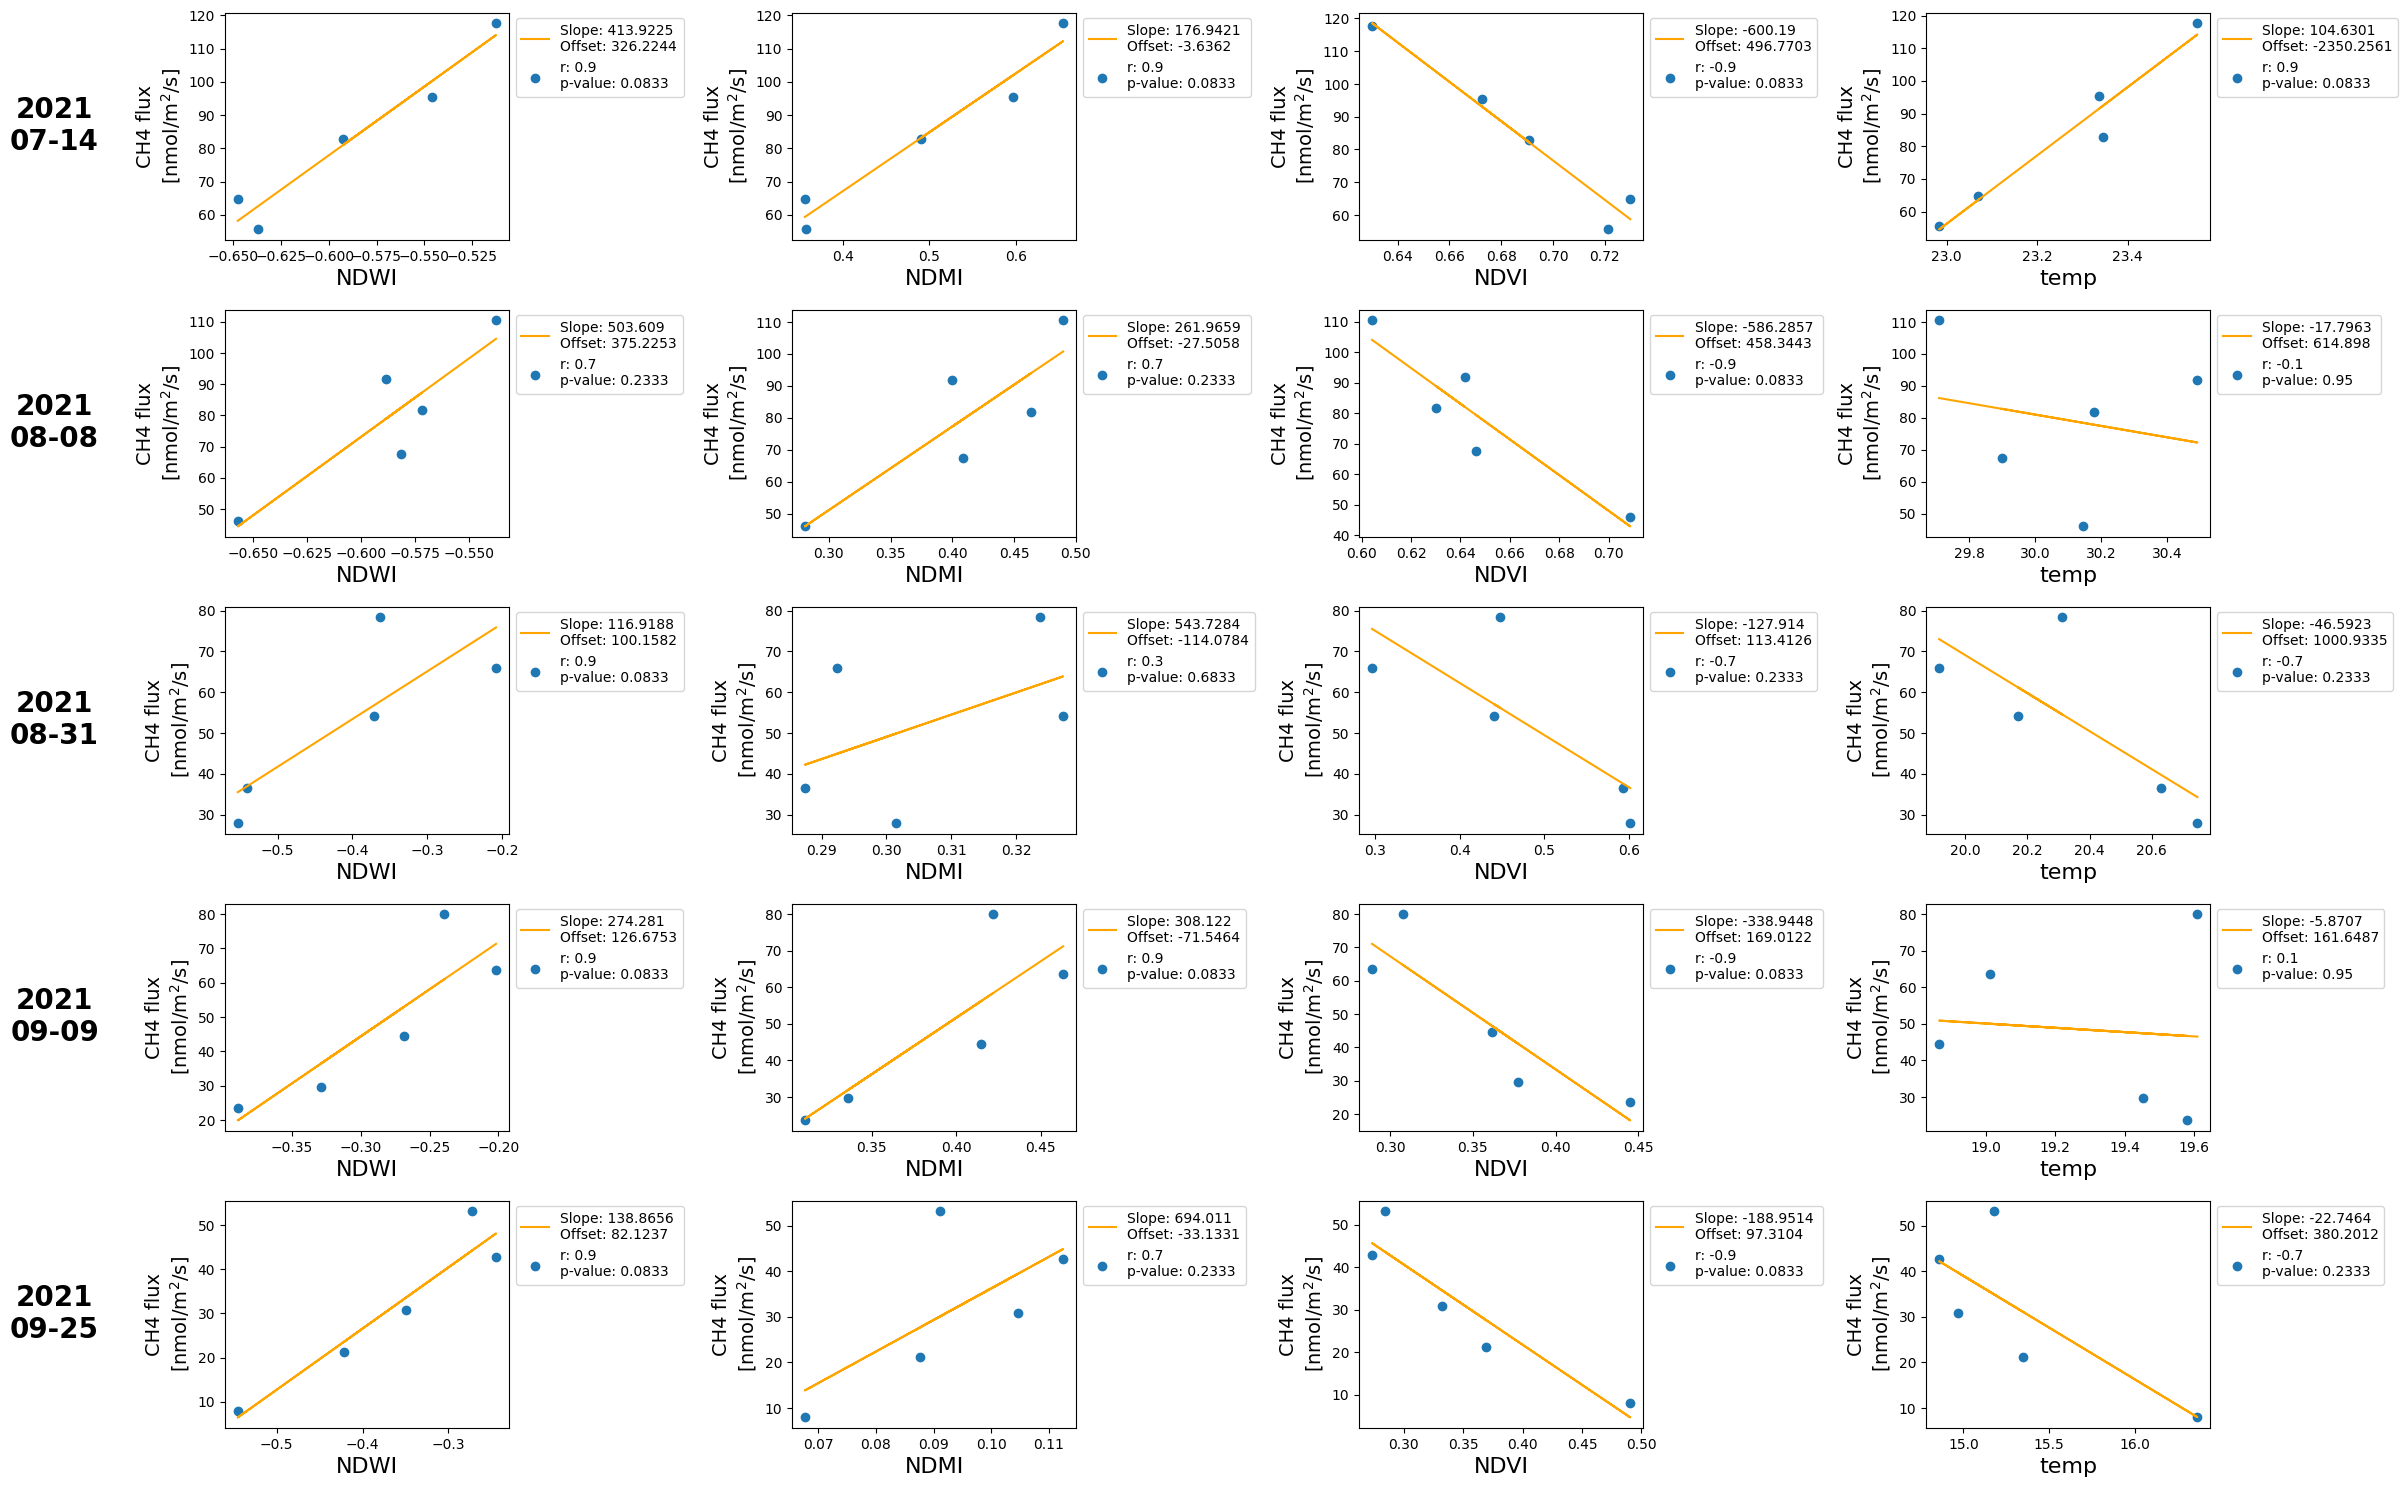

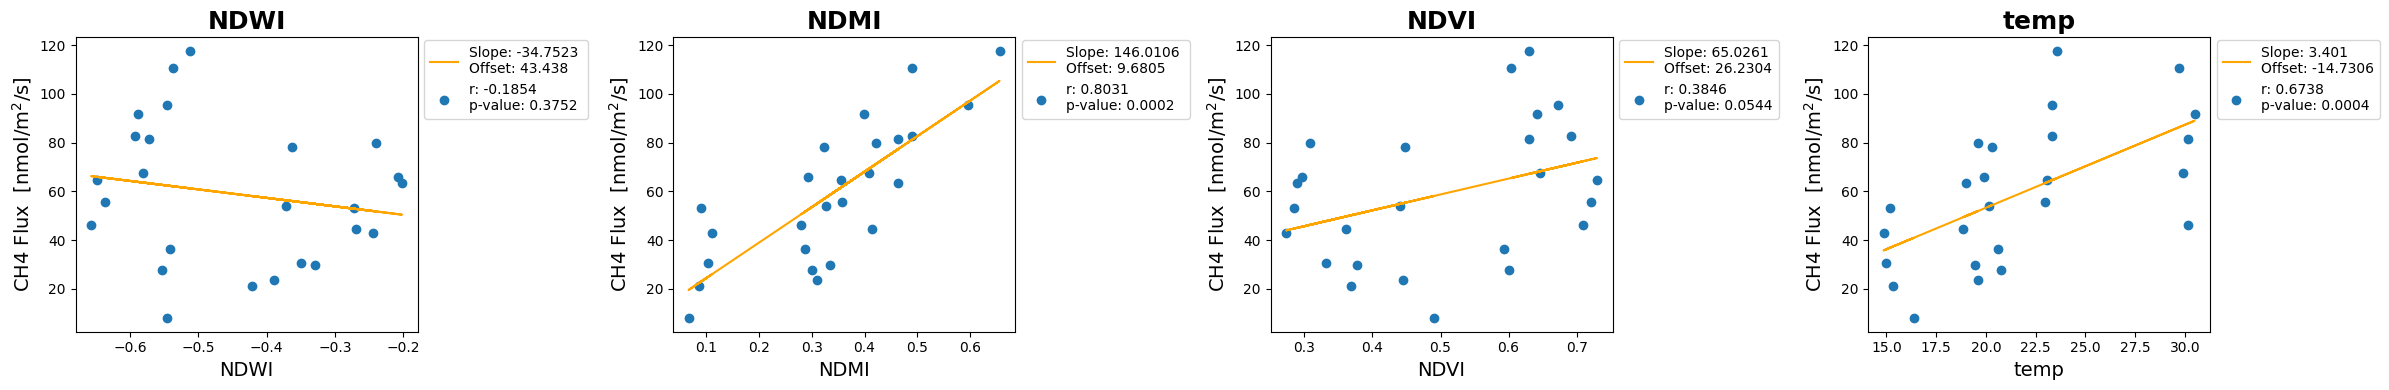

In [249]:
# Compilation!
import os
from thesis import compiled_regression
import numpy as np
folder_path = '/Users/darianng/Documents/Msc_Geography/Methane_Hotspot/FARF_Code/python_code/Saved_Data_Cluster_May2023'

subfolder_names = []
runs = []

# Getting all available runs
for root, dirs, files in os.walk(folder_path):
    for dir_name in dirs:
        subfolder_names.append(os.path.join(root, dir_name))
        runs.append(dir_name)
        
# Getting specific period
target_year = np.array([2021])
target_month = [5,9] # start,end
chosen_runs = []

for run_idx,run in enumerate(runs):
    run_year = int(run[33:37])
    run_month = int(run[37:39])
    if np.any(run_year == target_year):
        if run_month >= target_month[0] and run_month <= target_month[1]:
            chosen_runs.append(run)
            
# This just orders the list in ascending date order
def get_last_number(item):
    return int(item.split('L8=')[-1])
chosen_runs = sorted(chosen_runs,key=get_last_number)

dataPath = '/Users/darianng/Documents/MSc_Geography/MSc Thesis/Data/Compilation/Young_Annual/'
fig1,fig2,compiled_data = compiled_regression(chosen_runs,dataPath,correlation='Spearman')
    

In [2]:
chosen_runs

['Young_FFP=202205008-202206007_L8=20220523',
 'Young_FFP=202205031-202206030_L8=20220615',
 'Young_FFP=202206016-202207016_L8=20220701',
 'Young_FFP=202207002-202208001_L8=20220717',
 'Young_FFP=202207011-202208010_L8=20220726',
 'Young_FFP=202208003-202209002_L8=20220818',
 'Young_FFP=202208019-202209018_L8=20220903',
 'Young_FFP=202209013-202210013_L8=20220928']

# Separately save data

In [252]:
import pickle
import os
SAVE = 0
savepath = '/Users/darianng/Documents/MSc_Geography/MSc Thesis/Data/Compilation/Young_Annual/2021_growing_season'
month = []
for i in compiled_data['collapsed_landsat']['period']:
    month.append(int(str(i)[4:6]))
compiled_data['collapsed_landsat']['month'] = month

if SAVE == 1:
    os.makedirs(savepath, exist_ok=True)
    fig1.savefig(savepath+'/compiled_individual.png')
    fig2.savefig(savepath+'/compiled_single_plot.png')
    with open(savepath+'/compiled_data.p', 'wb') as fp:
            pickle.dump(compiled_data, fp, protocol=pickle.HIGHEST_PROTOCOL)
    print('SAVED!')

In [111]:
showAllKeys(compiled_data)

--ALL DATA KEYS--

Key: collected_regression
       ['period', 'r_val', 'p_val', 'landsat', 'ffp']
Key: collapsed_regression
       ['slope', 'offset', 'r_val', 'p_val']
Key: collapsed_landsat
       ['NDWI', 'NDMI', 'NDVI', 'temp']
Key: collapsed_ffp
Key: yfit
       ['slope', 'offset']


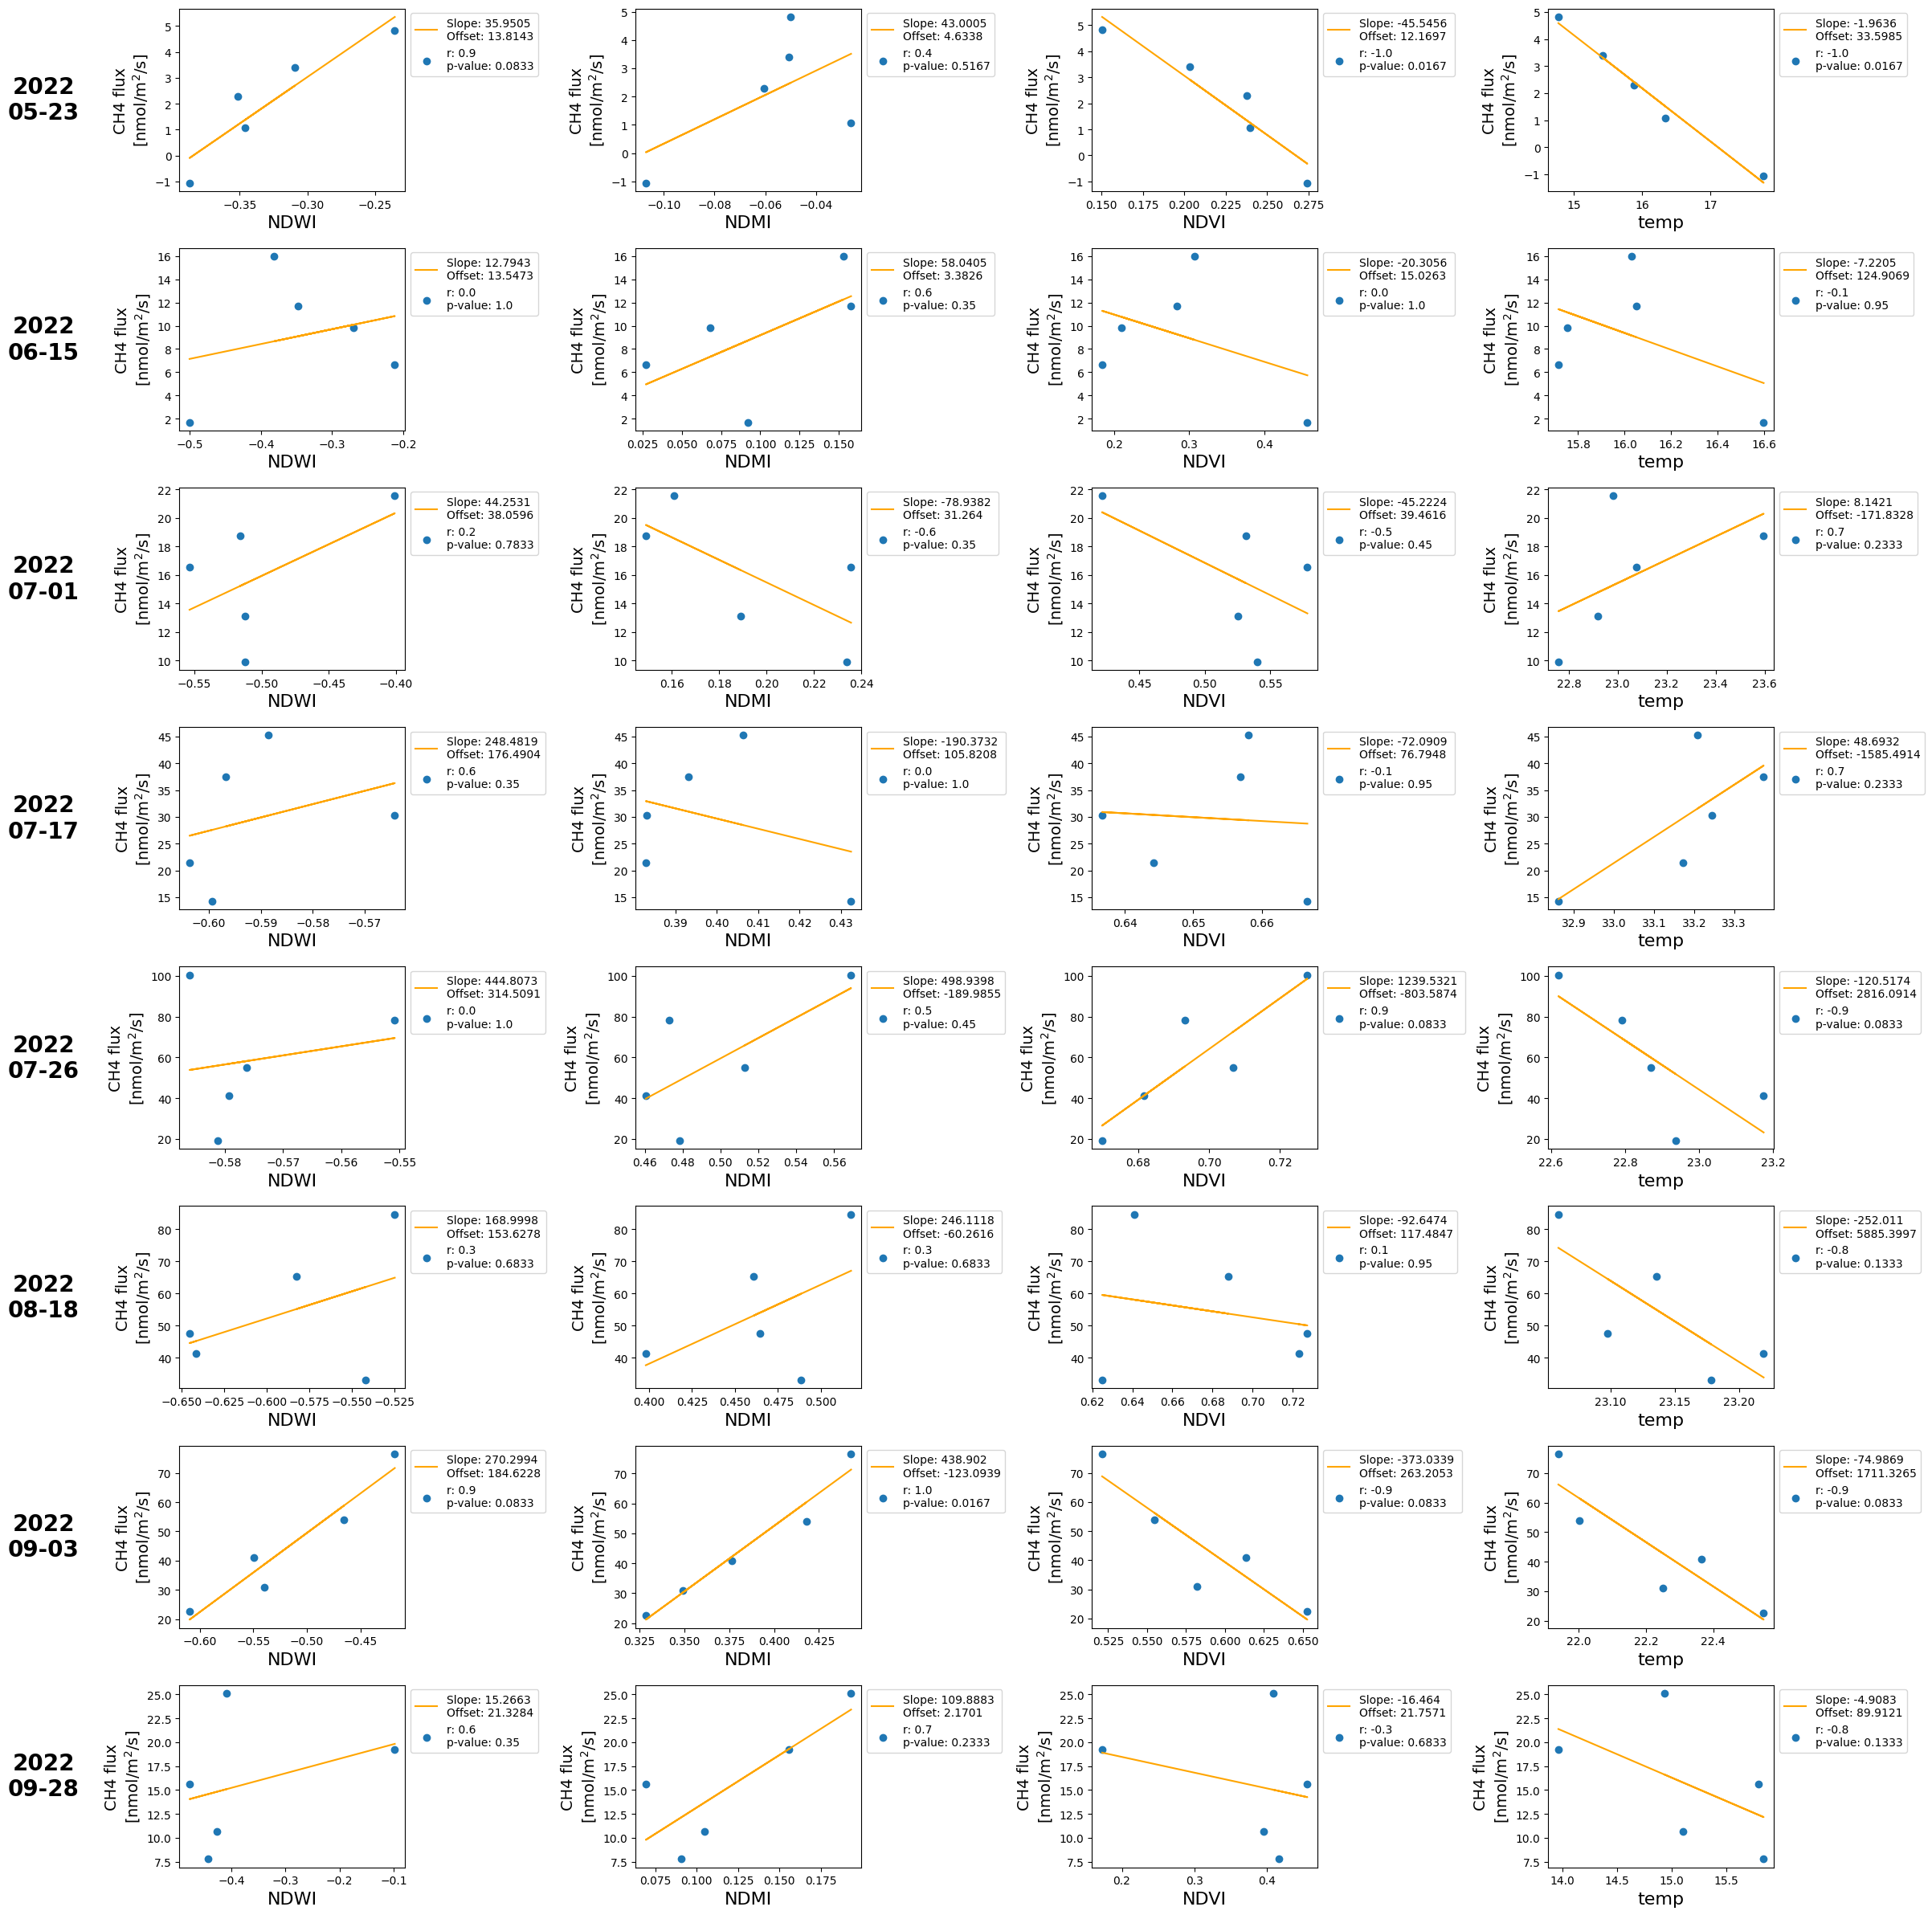

In [11]:
fig1

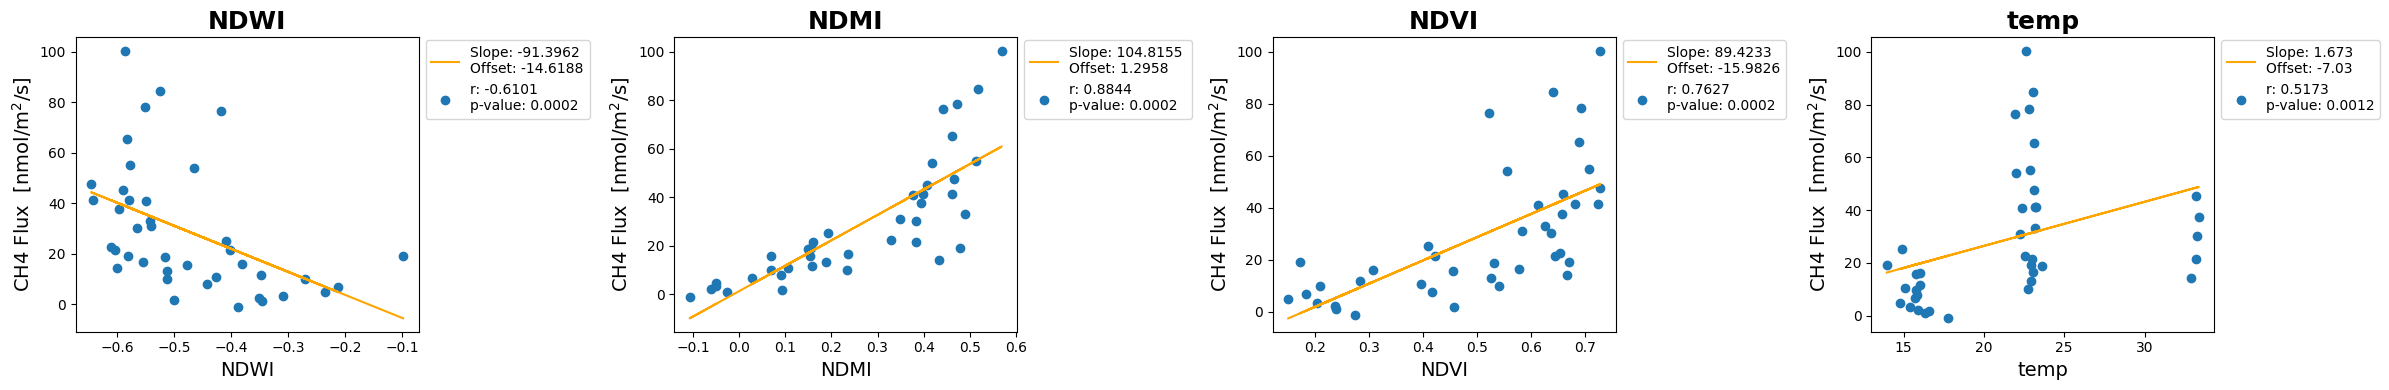

In [17]:
fig2

[20220523, 20220523, 20220523, 20220523, 20220523]
[20220523, 20220523, 20220523, 20220523, 20220523]
[20220523, 20220523, 20220523, 20220523, 20220523]
[20220523, 20220523, 20220523, 20220523, 20220523]


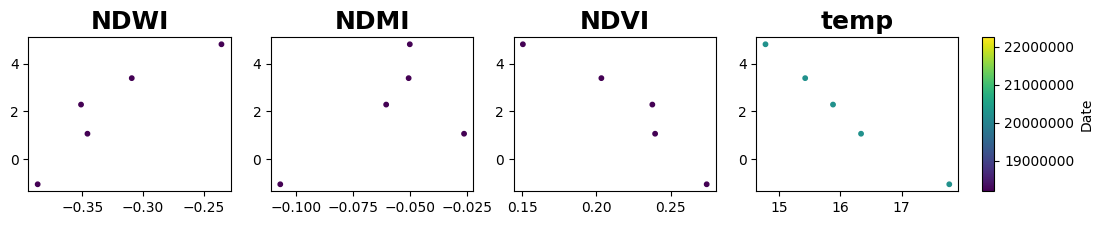

In [49]:
keys = ['NDWI','NDMI','NDVI','temp']
fig,ax = plt.subplots(1,4,figsize=(12,2))
for idx,key in enumerate(keys):
    ax_plot = ax[idx].scatter(compiled_data['collapsed_landsat'][key][:5],compiled_data['collapsed_ffp'][:5],c=compiled_data['collapsed_landsat']['period'][:5],s=10)
    print(compiled_data['collapsed_landsat']['period'][:5])
    ax[idx].set_title(key,fontsize=18,fontweight='bold')
cbar_ax = fig.add_axes([0.92, 0.11, 0.01, 0.77])
cbar1 = fig.colorbar(ax_plot,cax=cbar_ax,format='%.0f',label = 'Date')

Text(0, 0.5, 'FCH4')

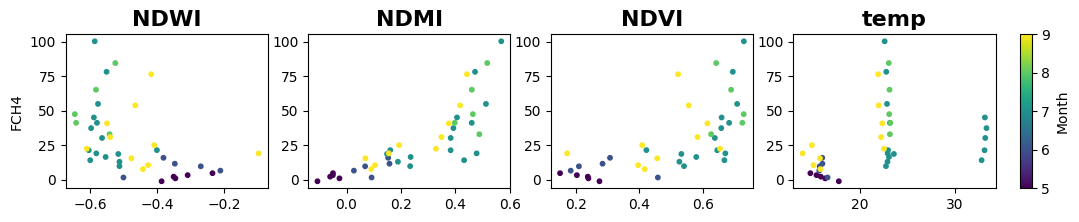

In [40]:
import matplotlib.pyplot as plt
month = []
for i in compiled_data['collapsed_landsat']['period']:
    month.append(int(str(i)[4:6]))
keys = ['NDWI','NDMI','NDVI','temp']
fig,ax = plt.subplots(1,4,figsize=(12,2))
for idx,key in enumerate(keys):
    ax_plot = ax[idx].scatter(compiled_data['collapsed_landsat'][key],compiled_data['collapsed_ffp'],c=month,s=10)
    
    ax[idx].set_title(key,fontsize=16,fontweight='bold')
    

cbar_ax = fig.add_axes([0.92, 0.11, 0.01, 0.77])
cbar1 = fig.colorbar(ax_plot,cax=cbar_ax,format='%.0f',label = 'Month')
ax[0].set_ylabel('FCH4')


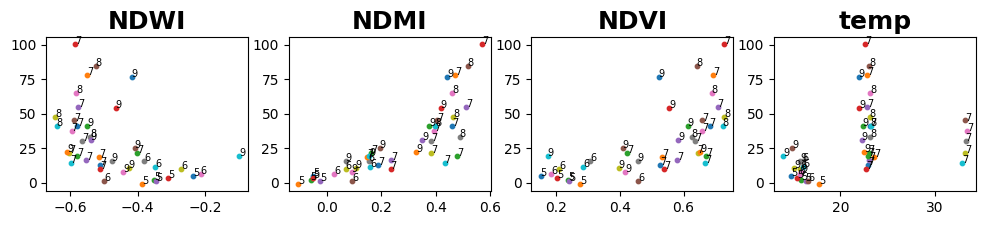

In [109]:
import matplotlib.pyplot as plt
month = []
for i in compiled_data['collapsed_landsat']['period']:
    month.append(int(str(i)[4:6]))
keys = ['NDWI','NDMI','NDVI','temp']
fig,ax = plt.subplots(1,4,figsize=(12,2))

for idx,key in enumerate(keys):
    x_data = compiled_data['collapsed_landsat'][key]
    y_data = compiled_data['collapsed_ffp']
    c_data = compiled_data['collapsed_landsat']['period']
    for i in range(len(x_data)):
        ax_plot = ax[idx].scatter(x_data[i],y_data[i],s=10)
        ax[idx].text(x_data[i],y_data[i],month[i],fontsize=7)
    
    ax[idx].set_title(key,fontsize=18,fontweight='bold')
#     plt.text
# cbar_ax = fig.add_axes([0.92, 0.11, 0.01, 0.77])
# cbar1 = fig.colorbar(ax_plot,cax=cbar_ax,format='%.0f',label = 'Date')


# MLR MODELLING

In [751]:
import pandas as pd
import numpy as np
model_folder = '/Users/darianng/Documents/MSc_Geography/MSc Thesis/Data/Model/'
model_coeff = pd.read_csv(model_folder+'Young2022_coeff.csv')
model = pd.read_csv(model_folder+'Young2022_fitted.csv')
del model['Unnamed: 0']
model_coeff = model_coeff.rename(columns={'Unnamed: 0': 'x_var'})

model_coeff_stepwise = pd.read_csv(model_folder+'Young2022_coeff_forwardAIC.csv')
model_stepwise = pd.read_csv(model_folder+'Young2022_fitted_forwardAIC.csv')
del model_stepwise['Unnamed: 0']
model_coeff_stepwise = model_coeff_stepwise.rename(columns={'Unnamed: 0': 'x_var'})

In [752]:
# Examine model
model_coeff_stepwise

,x_var,x
0,(Intercept),23.920241
1,NDMI,131.437865
2,temp,-1.380697


In [725]:
def yhat_predict(observation,model_coeff):
    """
    Applying MLR Model:
    yhat = ß0 + ß1*month.f6 + ß2*month.f7 + ß3*month.f8 + ß4*month.f9 +ß5*NDVI + ß6*NDWI + ß7*NDMI + ß8*temp 
           + [ß9,ß10,ß11,ß12]*month.f6,f7,f8,f9*NDVI + [ß13,ß14,ß15,ß16]*month.f6,f7,f8,f9*NDWI + [ß17,ß18,ß19,ß20]*month.f6,f7,f8,f9*NDMI + [ß21,ß22,ß23,ß24]*month.[f6,f7,f8,f9]*temp
    Inputs:
        model = dataframe of landsat 8 map to be used as x-data
        model_coeff = MLR model coefficients
    """
    x_var = model_coeff['x_var']
    fixed = []
    interaction = []
    for idx,x_name in enumerate(x_var):
        # x variable coefficient
        b = model_coeff['x'][idx] 
        
        # Fixed effects
        if "month" not in x_name and x_name != '(Intercept)': 
            X = observation[x_name] # All observation data of this x variable
            fixed.append(X*b)

    # Factor
    if any("month" in string for string in model_coeff['x_var']): # If month.f exists as a predictor
        f6 = model_coeff[model_coeff['x_var'] == 'month.f6'].index[0] # month.f6 index
        f7 = model_coeff[model_coeff['x_var'] == 'month.f7'].index[0] # month.f7 index
        f8 = model_coeff[model_coeff['x_var'] == 'month.f8'].index[0] # month.f8 index
        f9 = model_coeff[model_coeff['x_var'] == 'month.f9'].index[0] # month.f9 index
        factor_map = {5:0,6:model_coeff['x'][f6],7:model_coeff['x'][f7],8:model_coeff['x'][f8],9:model_coeff['x'][f9]}
    else:
        factor_map = {5:0,6:0,7:0,8:0,9:0}
    factor = [factor_map[item] for item in observation['month.f']]

    # Interaction - Can't get away with not doing a for loop
    # All interaction terms
    interact_terms = [term for string in model_coeff['x_var'] for term in string.split() if ":" in term]
    # All interaction terms' index
    interact_terms_idx = [(index) for index, string in enumerate(model_coeff['x_var']) for b, char in enumerate(string) if char == ":"]
    # Populating dict that can call interaction coefficient by the term name.
    interact_dict = {}
    for i,term in enumerate(interact_terms):
        interact_dict[term]=model_coeff['x'][interact_terms_idx[i]]
    # All fixed terms that get interacted with.
    interact_fixed = np.unique([term.split(':')[1] for string in model_coeff['x_var'] for term in string.split() if ":" in term])
    
    # Iterating through each i in xi
    interaction = []
    for i,month in enumerate(observation['month.f']):
        total_term = 0
        if month != 5:
            for fixed_term in interact_fixed:
                coeff_name = 'month.f'+str(month)+':'+fixed_term
                current_term = interact_dict[coeff_name] * observation[fixed_term][i]
                total_term += current_term
        interaction.append(total_term)
    
    # Summing
    summed_fixed = [sum(element) for element in zip(*fixed)]

    yhat_pred = [sum(element)+model_coeff['x'][0] for element in zip(summed_fixed,factor,interaction)]

    return yhat_pred

# Predicting on Single Footprint-weighted Flux Map (non-clustered)

In [753]:
from thesis import preprocess_maps

ffp_path = '/Users/darianng/Documents/MSc_Geography/Methane_Hotspot/FARF_Code/python_code/data'
data = preprocess_maps(siteName = 'Young',fluxmap_filename = '202205010-202206010',L8_date = 20220523,ffp_datapath = ffp_path)
# Creating the new DataFrame
columns_to_select = ['NDVI','NDWI','NDMI','temp']
observation = pd.DataFrame({col: data['landsat'][col] for col in columns_to_select})
month = [int(str(data['run'][0])[4:6])]*len(observation['NDVI'])
observation['month.f'] = month

Beginning resolution matching: /689
0%..7%..14%..21%..29%..36%..43%..50%..58%..65%..72%..79%..87%..94%..DONE


In [754]:
yhat_pred = yhat_predict(observation=observation,model_coeff=model_coeff_stepwise)
print(f'Check length: {len(yhat_pred)}')

Check length: 689


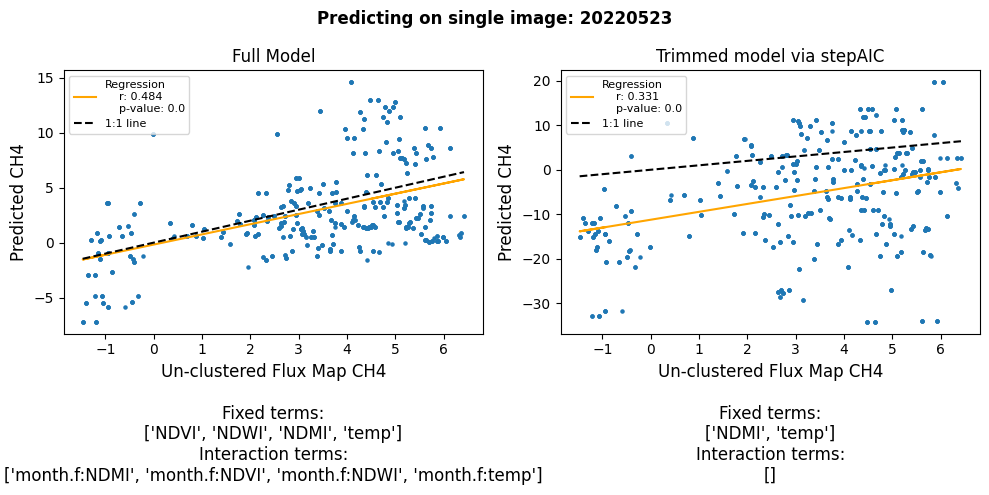

In [755]:
from scipy import stats
import matplotlib.pyplot as plt
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
yhat_pred = yhat_predict(observation=observation,model_coeff=model_coeff)
# Model details:
fixed_terms = [term for string in model_coeff['x_var'] for term in string.split() if ".f" not in term][1:]
interaction_fixed = np.unique([term.split(':')[1] for string in model_coeff['x_var'] for term in string.split() if ":" in term])
interaction_terms = ['month.f:'+term for term in interaction_fixed]
x_data= data['matched_ffp']['ch4']
y_data = yhat_pred
# Regression data
plt.scatter(x_data,y_data,s=5)
m, b = np.polyfit(x_data,y_data,1)
yfit_line = m*np.array(x_data)+b
r_val, p_val = stats.pearsonr(x_data,y_data); corr = f'Regression\n    r: {np.round(r_val,3)} \n    p-value: {np.round(p_val,3)}'
plt.plot(x_data,yfit_line,'orange',label=corr)

plt.plot([min(x_data),max(x_data)],[min(x_data),max(x_data)],'--k',label='1:1 line')
plt.ylabel(f'Predicted CH4',fontsize=12); 
plt.xlabel(f'Un-clustered Flux Map CH4\n\nFixed terms:\n{fixed_terms}\nInteraction terms:\n{interaction_terms}',fontsize=12)
plt.title(f'Full Model')
plt.legend(fontsize=8)

plt.subplot(1,2,2)
yhat_pred = yhat_predict(observation=observation,model_coeff=model_coeff_stepwise)
# Model details:
fixed_terms = [term for string in model_coeff_stepwise['x_var'] for term in string.split() if ".f" not in term][1:]
interaction_fixed = np.unique([term.split(':')[1] for string in model_coeff_stepwise['x_var'] for term in string.split() if ":" in term])
interaction_terms = ['month.f:'+term for term in interaction_fixed]
x_data= data['matched_ffp']['ch4']
y_data = yhat_pred
# Regression data
plt.scatter(x_data,y_data,s=5)
m, b = np.polyfit(x_data,y_data,1)
yfit_line = m*np.array(x_data)+b
r_val, p_val = stats.pearsonr(x_data,y_data); corr = f'Regression\n    r: {np.round(r_val,3)} \n    p-value: {np.round(p_val,3)}'
plt.plot(x_data,yfit_line,'orange',label=corr)

plt.plot([min(x_data),max(x_data)],[min(x_data),max(x_data)],'--k',label='1:1 line')
plt.ylabel(f'Predicted CH4',fontsize=12)
plt.xlabel(f'Un-clustered Flux Map CH4\n\nFixed terms:\n{fixed_terms}\nInteraction terms:\n{interaction_terms}',fontsize=12)
plt.title(f'Trimmed model via stepAIC')
plt.suptitle(f'Predicting on single image: {data["run"][0]}',fontweight='bold')
plt.legend(fontsize=8)
plt.tight_layout()

# Predicting on Single Footprint-weighted Flux Map (clustered)

In [743]:
from thesis import preprocess_maps
from thesis import ffp_clustering

ffp_path = '/Users/darianng/Documents/MSc_Geography/Methane_Hotspot/FARF_Code/python_code/data'
data = preprocess_maps(siteName = 'Young',fluxmap_filename = '202205010-202206010',L8_date = 20220523,ffp_datapath = ffp_path)
data, fig = ffp_clustering(data,GHG_var='ch4',n_clusters=5)
plt.close()
# Creating the new DataFrame
columns_to_select = ['NDVI','NDWI','NDMI','temp']
observation = pd.DataFrame({col: data['clustered_landsat'][col] for col in columns_to_select})
month = [int(str(data['run'][0])[4:6])]*len(observation['NDVI'])
observation['month.f'] = month

Beginning resolution matching: /689
0%..7%..14%..21%..29%..36%..43%..50%..58%..65%..72%..79%..87%..94%..DONE
Confirming current Gas: ch4


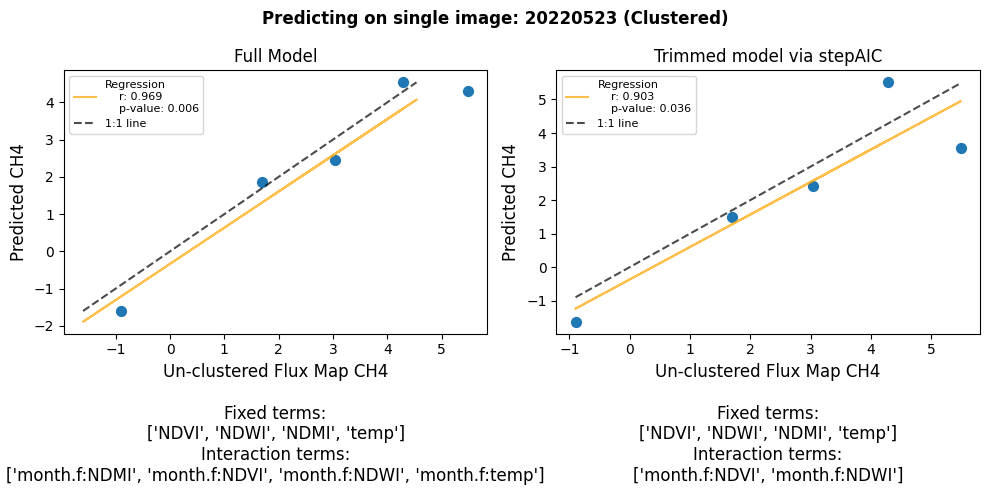

In [744]:
from scipy import stats
import matplotlib.pyplot as plt
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
yhat_pred = yhat_predict(observation=observation,model_coeff=model_coeff)
# Model details:
fixed_terms = [term for string in model_coeff['x_var'] for term in string.split() if ".f" not in term][1:]
interaction_fixed = np.unique([term.split(':')[1] for string in model_coeff['x_var'] for term in string.split() if ":" in term])
interaction_terms = ['month.f:'+term for term in interaction_fixed]
x_data= data['clustered_ffp']
y_data = yhat_pred
# Regression data
plt.scatter(x_data,y_data,s=50)
m, b = np.polyfit(x_data,y_data,1)
yfit_line = m*np.array(y_data)+b
r_val, p_val = stats.pearsonr(x_data,y_data); corr = f'Regression\n    r: {np.round(r_val,3)} \n    p-value: {np.round(p_val,3)}'
plt.plot(y_data,yfit_line,'orange',label=corr,alpha=0.7)

plt.plot([min(yhat_pred),max(yhat_pred)],[min(yhat_pred),max(yhat_pred)],'--k',label='1:1 line',alpha=0.7)
plt.ylabel(f'Predicted CH4',fontsize=12); 
plt.xlabel(f'Un-clustered Flux Map CH4\n\nFixed terms:\n{fixed_terms}\nInteraction terms:\n{interaction_terms}',fontsize=12)
plt.title(f'Full Model')
plt.legend(fontsize=8)

plt.subplot(1,2,2)
yhat_pred = yhat_predict(observation=observation,model_coeff=model_coeff_stepwise)
# Model details:
fixed_terms = [term for string in model_coeff_stepwise['x_var'] for term in string.split() if ".f" not in term][1:]
interaction_fixed = np.unique([term.split(':')[1] for string in model_coeff_stepwise['x_var'] for term in string.split() if ":" in term])
interaction_terms = ['month.f:'+term for term in interaction_fixed]
x_data= data['clustered_ffp']
y_data = yhat_pred
# Regression data
plt.scatter(x_data,y_data,s=50)
m, b = np.polyfit(x_data,y_data,1)
yfit_line = m*np.array(x_data)+b
r_val, p_val = stats.pearsonr(x_data,y_data); corr = f'Regression\n    r: {np.round(r_val,3)} \n    p-value: {np.round(p_val,3)}'
plt.plot(x_data,yfit_line,'orange',label=corr,alpha=0.7)

plt.plot([min(x_data),max(x_data)],[min(x_data),max(x_data)],'--k',label='1:1 line',alpha=0.7)
plt.ylabel(f'Predicted CH4',fontsize=12)
plt.xlabel(f'Un-clustered Flux Map CH4\n\nFixed terms:\n{fixed_terms}\nInteraction terms:\n{interaction_terms}',fontsize=12)
plt.title(f'Trimmed model via stepAIC')
plt.suptitle(f'Predicting on single image: {data["run"][0]} (Clustered)',fontweight='bold')
plt.legend(fontsize=8)
plt.tight_layout()

# Predicting on another year's growing season

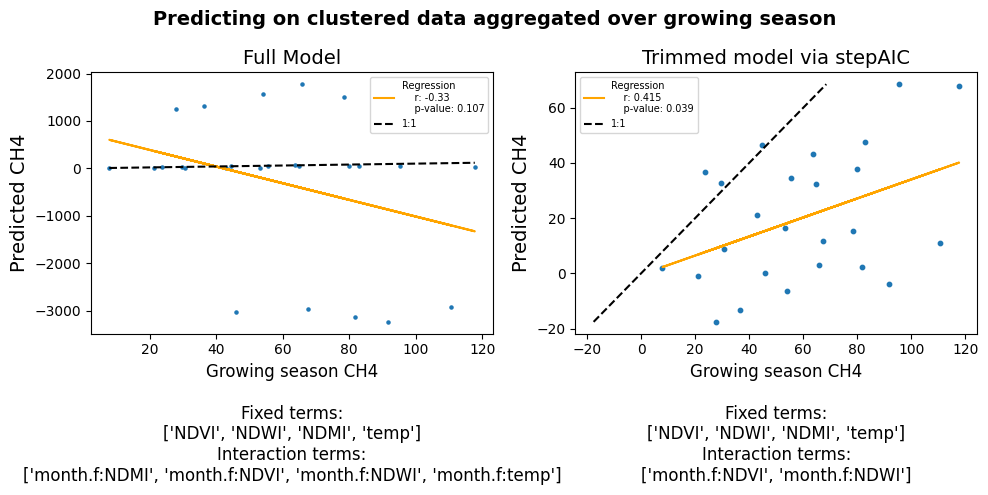

In [745]:
import pickle
with open('/Users/darianng/Documents/MSc_Geography/MSc Thesis/Data/Compilation/Young_Annual/2021_growing_season/compiled_data.p', 'rb') as fp:
    growing_2021 = pickle.load(fp)
# Making model-formatted dataframe
columns_to_select = ['NDVI','NDWI','NDMI','temp']
observation = pd.DataFrame({col: growing_2021['collapsed_landsat'][col] for col in columns_to_select})
observation['month.f'] = growing_2021['collapsed_landsat']['month']

plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
yhat_pred = yhat_predict(observation=observation,model_coeff=model_coeff)
fixed_terms = [term for string in model_coeff['x_var'] for term in string.split() if ".f" not in term][1:]
interaction_fixed = np.unique([term.split(':')[1] for string in model_coeff['x_var'] for term in string.split() if ":" in term])
interaction_terms = ['month.f:'+term for term in interaction_fixed]

x_data= growing_2021['collapsed_ffp']
y_data = yhat_pred
# Regression data
plt.scatter(x_data,y_data,s=5)
m, b = np.polyfit(x_data,y_data,1)
yfit_line = m*np.array(x_data)+b
r_val, p_val = stats.pearsonr(x_data,y_data); corr = f'Regression\n    r: {np.round(r_val,3)} \n    p-value: {np.round(p_val,3)}'
plt.plot(x_data,yfit_line,'orange',label=corr)

plt.plot([min(x_data),max(x_data)],[min(x_data),max(x_data)],'--k',label='1:1')
plt.ylabel('Predicted CH4',fontsize=14)
plt.xlabel(f'Growing season CH4\n\nFixed terms:\n{fixed_terms}\nInteraction terms:\n{interaction_terms}',fontsize=12)
plt.title('Full Model',fontsize=14)
plt.legend(fontsize=7)

plt.subplot(1,2,2)
yhat_pred = yhat_predict(observation=observation,model_coeff=model_coeff_stepwise)
fixed_terms = [term for string in model_coeff_stepwise['x_var'] for term in string.split() if ".f" not in term][1:]
interaction_fixed = np.unique([term.split(':')[1] for string in model_coeff_stepwise['x_var'] for term in string.split() if ":" in term])
interaction_terms = ['month.f:'+term for term in interaction_fixed]

x_data= growing_2021['collapsed_ffp']
y_data = yhat_pred
# Regression data
plt.scatter(x_data,y_data,s=10)
m, b = np.polyfit(x_data,y_data,1)
yfit_line = m*np.array(x_data)+b
r_val, p_val = stats.pearsonr(x_data,y_data); corr = f'Regression\n    r: {np.round(r_val,3)} \n    p-value: {np.round(p_val,3)}'
plt.plot(x_data,yfit_line,'orange',label=corr)

plt.plot([min(yhat_pred),max(yhat_pred)],[min(yhat_pred),max(yhat_pred)],'--k',label='1:1')
plt.ylabel('Predicted CH4',fontsize=14)
plt.xlabel(f'Growing season CH4\n\nFixed terms:\n{fixed_terms}\nInteraction terms:\n{interaction_terms}',fontsize=12)
plt.title(f'Trimmed model via stepAIC',fontsize=14)
plt.suptitle(f'Predicting on clustered data aggregated over growing season',fontweight='bold',fontsize=14)
plt.legend(fontsize=7)
plt.tight_layout()

In [254]:
showAllKeys(growing_2021)

--ALL DATA KEYS--

Key: collected_regression
       ['period', 'r_val', 'p_val', 'landsat', 'ffp']
Key: collapsed_regression
       ['slope', 'offset', 'r_val', 'p_val']
Key: collapsed_landsat
       ['NDWI', 'NDMI', 'NDVI', 'temp', 'period', 'month']
Key: collapsed_ffp
Key: yfit
       ['slope', 'offset']


In [248]:
growing_2021['collected_regression']['period']

['Young_FFP=202106029-202107029_L8=20210714',
 'Young_FFP=202107024-202108023_L8=20210808',
 'Young_FFP=202108016-202109015_L8=20210831',
 'Young_FFP=202108025-202109024_L8=20210909',
 'Young_FFP=202109010-202110010_L8=20210925']

In [ ]:
# Old model calculation
import numpy as np
# Calculating yhat using MLR coefficients
def yhat_predict(model,model_coeff):
    """
    Applying MLR Model:
    yhat = ß0 + ß1*month.f6 + ß2*month.f7 + ß3*month.f8 + ß4*month.f9 +ß5*NDVI + ß6*NDWI + ß7*NDMI + ß8*temp 
           + [ß9,ß10,ß11,ß12]*month.f6,f7,f8,f9*NDVI + [ß13,ß14,ß15,ß16]*month.f6,f7,f8,f9*NDWI + [ß17,ß18,ß19,ß20]*month.f6,f7,f8,f9*NDMI + [ß21,ß22,ß23,ß24]*month.[f6,f7,f8,f9]*temp
    Inputs:
        model = dataframe of landsat 8 map to be used as x-data
        model_coeff = MLR model coefficients
    """
    b = model_coeff['x']
    yhat_pred = []
    for ii in range(len(model['NDVI'])):
        NDVI = model['NDVI'][ii]; NDMI = model['NDMI'][ii]
        NDWI = model['NDWI'][ii]; temp = model['temp'][ii]
        month = model['month.f'][ii]
        # Fixed effects
        fixed = np.sum(b[5]*NDVI + b[6]*NDWI + b[7]*NDMI + b[8]*temp)
        # Factor & interaction
        if month == 5:
            factor = 0
            interaction = 0
        else:
            factor = b[month-5] #shortcut to relate month# with ß#
            interaction = np.sum(b[month+3]*NDVI + b[month+7]*NDWI + b[month+11]*NDMI + b[month+15]*temp)

        yhat_calc = b[0] + fixed + factor + interaction
        yhat_pred.append(yhat_calc)
    return yhat_pred